In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir("dataset")

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['beaus_line', 'black_line', 'mees_line', 'onycholysis', 'terrys_nail']
Types of classes labels found:  5


In [2]:
class_labels = []

for item in dataset_path:
    all_classes = os.listdir('dataset' + '/' +item)
    
    for room in all_classes:
        class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

       Labels                                image
0  beaus_line  dataset_path/beaus_line/beau_10.jpg
1  beaus_line  dataset_path/beaus_line/beau_11.jpg
2  beaus_line  dataset_path/beaus_line/beau_12.jpg
3  beaus_line  dataset_path/beaus_line/beau_13.jpg
4  beaus_line  dataset_path/beaus_line/beau_14.jpg
          Labels                                  image
295  terrys_nail   dataset_path/terrys_nail/terry_6.jpg
296  terrys_nail  dataset_path/terrys_nail/terry_60.jpg
297  terrys_nail   dataset_path/terrys_nail/terry_7.jpg
298  terrys_nail   dataset_path/terrys_nail/terry_8.jpg
299  terrys_nail   dataset_path/terrys_nail/terry_9.jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  300
beaus_line     60
black_line     60
mees_line      60
onycholysis    60
terrys_nail    60
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(300, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line' 'beaus_line'
 'black_line' 'black_line' 'black_line' 'black_line' 'black_line'
 'black_line' 'black_line' 'black_line' 'black_line' 'black_line'
 'black_line' 'black_line' 'black_line' 'black_line' 'black_line'
 'black_li

In [8]:
y=y.reshape(-1,1)

In [9]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [10]:


from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:-5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(285, 224, 224, 3)
(285, 5)
(15, 224, 224, 3)
(15, 5)


In [12]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 5
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [13]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=2, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 5)                4055976   
                                                                 
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/2
9/9 - 154s - loss: 5.7447 - accuracy: 0.2351 - 154s/epoch - 17s/step
Epoch 2/2
9/9 - 120s - loss: 4.4245 - accuracy: 0.2491 - 120s/epoch - 13s/step


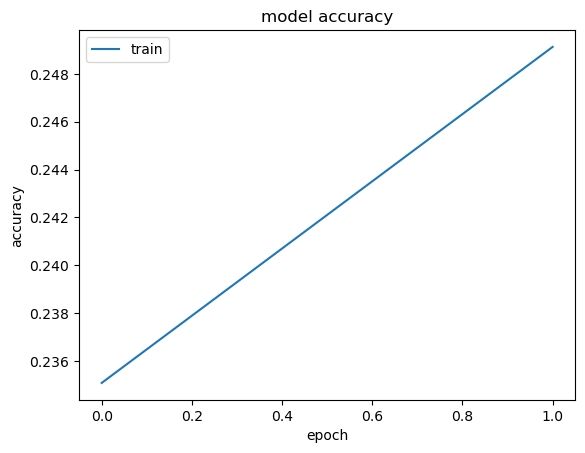

In [14]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [15]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 6s 6s/step - loss: 1.6233 - accuracy: 0.2667
Loss = 1.62332022190094
Test Accuracy = 0.2666666805744171


Input image shape: (1, 224, 224, 3)


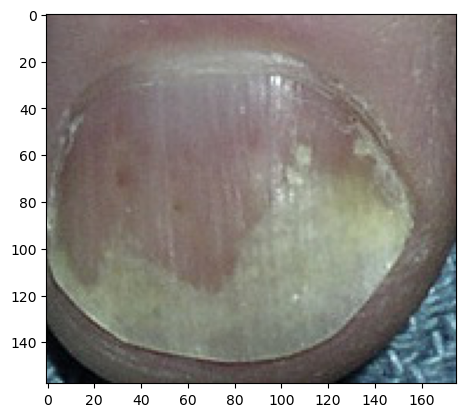

In [16]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'onycholysis_15.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [17]:
preds=model.predict(x)
preds 

1/1 [==============================] - 4s 4s/step


array([[0.20578375, 0.2682018 , 0.12555154, 0.11758599, 0.28287694]],
      dtype=float32)